In [10]:
import pandas as pd
import numpy as np

In [11]:
def block_recognition(file):
    a=False # first block'<'
    b=False # second block '<'
    c=False # third block '>'
    d=False # fourth block'>'
    i=0
    O_boundary=pd.DataFrame((), columns=[])
    Oh=[]
    aOh1=[]
    Ol=[]
    aOl1=[]
    bOh=[]
    bOl=[]
    block=[]
    l=0
    check=True
    ## Because the building block is constructing the structure in a such way that 
    while i<len(file):
        if l<32:
            
            
            # Check for first '<' and print'<' if there is and a=True
            if a==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==3 and file.iloc[i+9]['type']==4: #Check for first '<' block
                a=True
                check=False
                block+=['<l','<l','<l','<l','<l','<l','<l','<l','<l','<l']
                k=i+10
                i=k
            if a==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==6 and file.iloc[i+9]['type']==8: #Check for first '<' block
                a=True
                check=False
                block+=['<l','<l','<l','<l','<l','<l','<l','<l','<l','<l']
                k=i+10
                i=k

           #search for second '<' and print '<' if found b=True 
            if  a==True and b==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4 and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4:
                b=True
                check=True
                Oh+=[file.iloc[i+5]['id']]
                block+=['<r','<r','<r','<r','<r','<r','<r','<r']
                k=i+8
                i=k
            if  a==True and b==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4 and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==6 and file.iloc[i+7]['type']==8:
                b=True
                check=True
                Oh+=[file.iloc[i+5]['id']]
                block+=['<r','<r','<r','<r','<r','<r','<r','<r']
                k=i+8
                i=k

            if a==True and b==True and c==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4:
                c=True
                check=False
                k=i+8
                block+=['>l','>l','>l','>l','>l','>l','>l','>l']
                i=k
            if a==True and b==True and c==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==6 and file.iloc[i+7]['type']==8:
                c=True
                check=False
                block+=['>l','>l','>l','>l','>l','>l','>l','>l']
                k=i+8
                i=k
            if a==True and b==True and c==True and d==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==3 and file.iloc[i+9]['type']==4:
                d=True
                Ol+=[file.iloc[i+5]['id']]
                block+=['>r','>r','>r','>r','>r','>r','>r','>r','>r','>r']
                k=i+10
                check=True
                i=k
            if a==True and b==True and c==True and d==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==6 and file.iloc[i+9]['type']==8:
                d=True
                Ol+=[file.iloc[i+5]['id']]
                block+=['>r','>r','>r','>r','>r','>r','>r','>r','>r','>r']
                k=i+10
                check=True
                i=k

            #Look if the cell is fully completed, i.e. if '<''<' and '>' '>' has been found
            if a==True and b==True and c==True and d==True :
                a=False
                b=False
                c=False
                d=False
                l+=1
                check=True
            if file.iloc[i]['type']==5 or file.iloc[i]['type']==7:
                block+=['water']
                i+=1
            else:
                
                if check==False:
                    i+=1
                    block+=['bridge']
                if check==True: 
                    block+=['-']
                    #print(file.iloc[i]['type'])
                    i+=1
        
        if l==32:
            if file.iloc[i]['type']==5 or file.iloc[i]['type']==7:
                check=True
                block+=['water']
                i+=1
            else:
                i+=1
                block+=['-']
    ### Addin the collumn to define the block 
    file['block']=block

    #adding a collumn that describe to which cell/cell boundary the item belongs 
    # if 0 it belong to upper or lower layer

    O_boundary['Ohid']=Oh
    O_boundary['Olid']=Ol
    return O_boundary, file


In [12]:
def O_boundarysearch(final, O_boundary): 
    Oh=[]
    Ol=[]
    for index, boundary in O_boundary.iterrows():
        for index, point in final.iterrows():
            if float(point['id'])==boundary['Ohid']: 
                Oh+=[[point['x'],point['y'],point['z']]]
            if float(point['id'])==boundary['Olid']: 
                Ol+=[[point['x'],point['y'],point['z']]]
    O_boundary['Oh']=Oh
    O_boundary['Ol']=Ol
    return O_boundary



In [13]:
def Cell_planes(O_boundary, df_location):
#### Defining the datafram that contain the normals of a cell, i.e. 4 collumns
    Cellplanes=pd.DataFrame((), columns=[])
    na1=[]
    na0=[]
    nb0=[]
    nb1=[]
    out=[]
    idl=[]
    ### Looping over all the cells and check if they have the corrext neighbours
    for k in range(0, len(O_boundary)):
        ### na1 direction of a1
        ### direction of a0
        k=(k)
        l=(df_location.iloc[k]['b0'])
        if l!='-': 
            l=int(l)
        n=(df_location.iloc[k]['a1'])
        i=0
        if n!='-':
            n=int((df_location.iloc[k]['a1']))
            m=(df_location.iloc[n]['b0'])
            if m!='-':
                m=int(m)
                # normal in a>0 direction
                na1+=[normal_plane(np.array(O_boundary.iloc[l]['Ol']),np.array(O_boundary.iloc[k]['Ol']),np.array(O_boundary.iloc[k]['Oh']),np.array(O_boundary.iloc[l]['Oh']))]
                # normal in a<0 direction
                na0+=[normal_plane(np.array(O_boundary.iloc[n]['Ol']),np.array(O_boundary.iloc[m]['Ol']),np.array(O_boundary.iloc[m]['Oh']),np.array(O_boundary.iloc[n]['Oh']))]
                #normal in b<0 direction
                nb0+=[normal_plane(np.array(O_boundary.iloc[k]['Ol']),np.array(O_boundary.iloc[n]['Ol']),np.array(O_boundary.iloc[n]['Oh']),np.array(O_boundary.iloc[k]['Oh']))]
                #normal in b>0 direction
                nb1+=[normal_plane(np.array(O_boundary.iloc[m]['Ol']),np.array(O_boundary.iloc[l]['Ol']),np.array(O_boundary.iloc[l]['Oh']),np.array(O_boundary.iloc[m]['Oh']))]
                idl+=[k]
                print(O_boundary.iloc[m]['Ol'],np.array(O_boundary.iloc[l]['Ol']))
            else:
                out+=[k]
        else:
            out+=[k]

## Associating into the associatate dataframe
    Cellplanes['na1']=na1
    Cellplanes['na0']=na0
    Cellplanes['nb0']=nb0
    Cellplanes['nb1']=nb1
    Cellplanes['id']=idl
    return Cellplanes

In [14]:
def normal_plane(point1, point2, point3,point4):
    vector1=point2-point1
    vector2=(point3+point4)/2-point1
    n=np.cross(vector1,vector2)
    d=-(n@point1)
    plane=[n[0],n[1],n[2],d]
    return np.array(plane)

In [47]:
def row(final,file, Cellplanes):
    i=0
    final['rowi']=-1
    zi=[]
    for i in range(0,len(final)):
        point2=np.array([final.iloc[i]['x'],final.iloc[i]['y'],final.iloc[i]['z'], 1])
        a01=(point2@Cellplanes.iloc[0]['na1'])
        a00=(point2@Cellplanes.iloc[0]['na0'])
        a10=(point2@Cellplanes.iloc[6]['na0'])
        a11=(point2@Cellplanes.iloc[6]['na1'])
        a20=(point2@Cellplanes.iloc[12]['na0'])
        a21=(point2@Cellplanes.iloc[12]['na1'])
        a30=(point2@Cellplanes.iloc[16]['na0'])
        a31=(point2@Cellplanes.iloc[16]['na1'])
        if a00>=0 and final.iloc[i]['rowi']==-1 and a01>=0 :
            final.at[i,'rowi']=0
        if a10>=0 and final.iloc[i]['rowi']==-1 and a11>=0:
            final.at[i,'rowi']=1
        if a20>=0 and final.iloc[i]['rowi']==-1 and a21>=0 :
            final.at[i,'rowi']=2
        if a30>=0 and final.iloc[i]['rowi']==-1 and a31>=0 :
            final.at[i,'rowi']=3
        if a01<0 and final.iloc[i]['rowi']==-1:
            final.at[i,'x']+=26.9408000000
            final.at[i,'rowi']=3
        if final.iloc[i]['rowi']==-1: 
            final.at[i,'rowi']=3
        if final.iloc[i]['z']>27.9873670000/2:
            zi+=[1]
        if final.iloc[i]['z']<=27.9873670000/2:
            zi+=[0]
    final['zi']=zi
        #if final.iloc[i]['row']==-1:
         #   if a01<0:
          #      final.iloc[i]['x']+=26.9408000000
           #     final.at[i,'row']=3
            #else:
    return final

[8.648604, 3.266262, 1.387518] [1.913404 3.266262 1.387518]
[9.352374, -2.943296, 15.381201] [ 2.617174 -2.943296 15.381201]
[4.577309, 9.475783, 1.387518] [-2.157891  9.475783  1.387518]
[5.281079, 3.266225, 15.381201] [-1.454121  3.266225 15.381201]
[0.506014, 15.685304, 1.387518] [-6.229186 15.685304  1.387518]
[1.209784, 9.475746, 15.381201] [-5.525416  9.475746 15.381201]
[15.383804, 3.266262, 1.387518] [8.648604 3.266262 1.387518]
[16.087574, -2.943296, 15.381201] [ 9.352374 -2.943296 15.381201]
[11.312509, 9.475783, 1.387518] [4.577309 9.475783 1.387518]
[12.016279, 3.266225, 15.381201] [ 5.281079  3.266225 15.381201]
[7.241214, 15.685304, 1.387518] [ 0.506014 15.685304  1.387518]
[7.944984, 9.475746, 15.381201] [ 1.209784  9.475746 15.381201]
[22.119004, 3.266262, 1.387518] [15.383804  3.266262  1.387518]
[22.822774, -2.943296, 15.381201] [16.087574 -2.943296 15.381201]
[18.047709, 9.475783, 1.387518] [11.312509  9.475783  1.387518]
[18.751479, 3.266225, 15.381201] [12.016279  

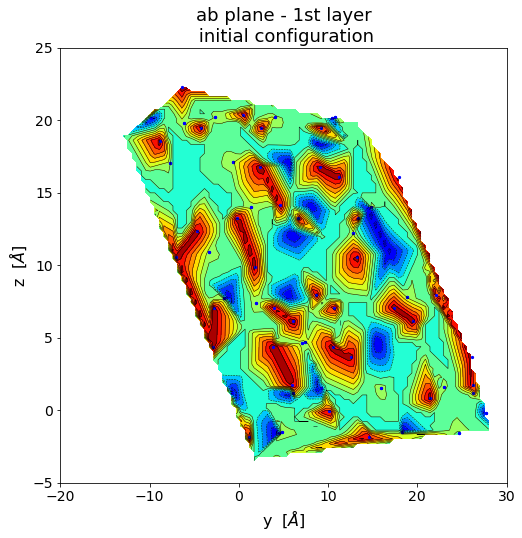

In [52]:
initial=pd.read_csv('data/qualitative/data_lmpo0001.lmp', delim_whitespace=True, skiprows=28, nrows=2025, names=['id','mol','type','charges','x','y','z','cell', 'block','zi'])
import plotly.express as px
import matplotlib.pyplot as plt
O_boundaryi, initial=block_recognition(initial)
df_location=pd.read_csv('data/output/location.txt',delim_whitespace=True)

O_boundaryf=O_boundarysearch(initial,O_boundaryi)
cellplanes=Cell_planes(O_boundaryf, df_location)
final=initial
rows=row(final, initial,cellplanes)
fig=px.scatter_3d(rows,x='x', y='y', z='z', color='zi')
fig.show()
x=[]
y=[]
z=[]
charge=[]
xm=[]
ym=[]
plt.figure(figsize=(8, 8))

for index, point in initial.iterrows():
    if point['zi']==0 and point['block']=='-': #and point['block']=='-':
        x+=[point['x']]
        xm+=[point['x']]
        ym+=[point['y']]
        y+=[point['y']]
        z+=[point['z']]
        charge+=[initial.iloc[int(point['id'])-1]['charges']]
    if point['zi']==0 and point['block']=='water':
        x+=[point['x']]
        y+=[point['y']]
        z+=[point['z']]
        charge+=[0]
from scipy.interpolate import griddata
# define grid.
# https://scipy-cookbook.readthedocs.io/items/Matplotlib_Gridding_irregularly_spaced_data.html
xi = np.linspace(-20,30,100)
yi = np.linspace(-5,25,100)
# grid the data.
zi = griddata((x, y), charge, (xi[None,:], yi[:,None]), method='linear')
# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
#plt.colorbar() 
# draw colorbar
# plot data points.
plt.scatter(xm,ym,marker='o',c='b',s=5)
plt.xlabel(r'y  [$\AA$]', fontsize=16)
plt.ylabel(r'z  [$\AA$]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('ab plane - 1st layer\n initial configuration', fontsize=18)

plt.autoscale(enable=True, axis='both')
plt.show()

[8.648604, 3.266262, 1.387518] [1.913404 3.266262 1.387518]
[9.352374, -2.943296, 15.381201] [ 2.617174 -2.943296 15.381201]
[4.577309, 9.475783, 1.387518] [-2.157891  9.475783  1.387518]
[5.281079, 3.266225, 15.381201] [-1.454121  3.266225 15.381201]
[0.506014, 15.685304, 1.387518] [-6.229186 15.685304  1.387518]
[1.209784, 9.475746, 15.381201] [-5.525416  9.475746 15.381201]
[15.383804, 3.266262, 1.387518] [8.648604 3.266262 1.387518]
[16.087574, -2.943296, 15.381201] [ 9.352374 -2.943296 15.381201]
[11.312509, 9.475783, 1.387518] [4.577309 9.475783 1.387518]
[12.016279, 3.266225, 15.381201] [ 5.281079  3.266225 15.381201]
[7.241214, 15.685304, 1.387518] [ 0.506014 15.685304  1.387518]
[7.944984, 9.475746, 15.381201] [ 1.209784  9.475746 15.381201]
[22.119004, 3.266262, 1.387518] [15.383804  3.266262  1.387518]
[22.822774, -2.943296, 15.381201] [16.087574 -2.943296 15.381201]
[18.047709, 9.475783, 1.387518] [11.312509  9.475783  1.387518]
[18.751479, 3.266225, 15.381201] [12.016279  

,id,mol,type,charges,x,y,z,cell,block,zi,rowi
0,1,1,1,2.00000,1.488894,-3.596500,13.140126,NaN,<l,0,0
1,2,1,2,4.00000,5.020753,-3.857300,12.034902,NaN,<l,0,0
2,3,2,3,0.84819,3.803840,-4.384488,12.911748,NaN,<l,0,0
3,4,2,4,-2.84819,3.803840,-4.384488,12.961748,NaN,<l,0,0
4,5,3,3,0.84819,26.037183,-2.813480,12.925742,NaN,<l,0,3
...,...,...,...,...,...,...,...,...,...,...,...
2020,2021,1,7,0.41000,7.305279,13.688286,20.213893,NaN,water,1,3
2021,2022,1,7,0.41000,7.305279,12.688286,21.213893,NaN,water,1,3
2022,2023,1,5,-0.82000,13.493322,10.941815,19.554235,NaN,water,1,3
2023,2024,1,7,0.41000,13.493322,10.941815,20.554235,NaN,water,1,3


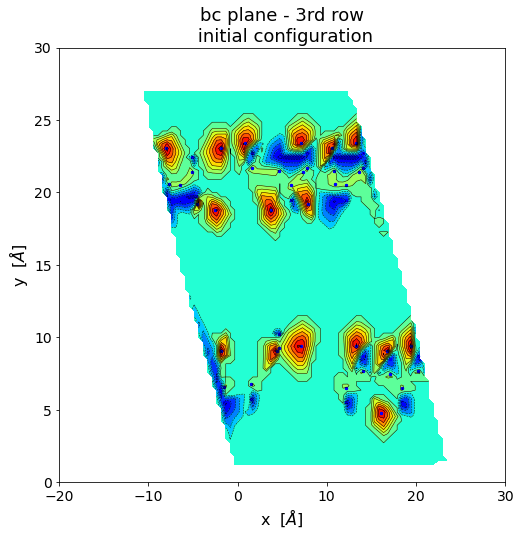

In [48]:
initial=pd.read_csv('data/qualitative/data_lmpo0001.lmp', delim_whitespace=True, skiprows=28, nrows=2025, names=['id','mol','type','charges','x','y','z','cell', 'block','zi'])
import plotly.express as px
import matplotlib.pyplot as plt
O_boundaryi, initial=block_recognition(initial)
#display(O_boundaryf)
df_location=pd.read_csv('data/output/location.txt',delim_whitespace=True)
#display(df_location)
O_boundaryf=O_boundarysearch(initial,O_boundaryi)
cellplanes=Cell_planes(O_boundaryf, df_location)
final=initial
rows=row(final, initial,cellplanes)
display(rows)
fig=px.scatter_3d(rows,x='x', y='y', z='z', color='rowi')
fig.show()
x=[]
y=[]
z=[]
charge=[]
xm=[]
ym=[]
plt.figure(figsize=(8, 8))
for index, point in rows.iterrows():
    if point['rowi']==2:#and point['block']=='-':
        x+=[point['x']]
        y+=[point['y']]
        z+=[point['z']]
        if point['block']=='-':
            charge+=[point['charges']]
            xm+=[point['y']]
            ym+=[point['z']]
        else:
            charge+=[0]
from scipy.interpolate import griddata
# define grid.
# https://scipy-cookbook.readthedocs.io/items/Matplotlib_Gridding_irregularly_spaced_data.html
xi = np.linspace(-20,30,100)
yi = np.linspace(-0,30,100)
# grid the data.
zi = griddata((y, z), charge, (xi[None,:], yi[:,None]), method='linear')
# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k', vmin=-1.5, vmax=2)
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet, vmin=-1.5, vmax=2)
#cbar=plt.colorbar() 
#cbar.set_label(label=r'charges [$C$]',size=16)


# draw colorbar
# plot data points.
plt.scatter(xm,ym,marker='o',c='b',s=5)
plt.scatter(xm,ym,marker='o',c='b',s=5)
plt.xlabel(r'x  [$\AA$]', fontsize=16)
plt.ylabel(r'y  [$\AA$]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('bc plane - 3rd row\n initial configuration', fontsize=18)

plt.autoscale(enable=True, axis='both')
plt.show()